In [1]:
import sys
sys.path.append("..")

import pandas as pd

SAVE_DIR = "../../data"

file_criteo = SAVE_DIR + "/criteo-uplift-v2.1.csv"

df_criteo = pd.read_csv(file_criteo, sep=',')
df_criteo

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [2]:
random_state=20220720
df_criteo=df_criteo.sample(frac=1.0, random_state=random_state).reset_index(drop=True)

X = df_criteo[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']].values

In [3]:
import numpy as np
# scale the feature values between 0 and 1
def scaling(x, min, max):
    return np.where(x < min, 0.0, np.where(x > max, 1.0, (x - min) / (max - min)))

X[:, 0] = scaling(X[:, 0], min=np.min(X[:, 0]), max=np.max(X[:, 0]))
X[:, 1] = scaling(X[:, 1], min=np.min(X[:, 1]), max=np.max(X[:, 1]))
X[:, 2] = scaling(X[:, 2], min=np.min(X[:, 2]), max=np.max(X[:, 2]))
X[:, 3] = scaling(X[:, 3], min=np.min(X[:, 3]), max=np.max(X[:, 3]))
X[:, 4] = scaling(X[:, 4], min=np.min(X[:, 4]), max=np.max(X[:, 4]))
X[:, 5] = scaling(X[:, 5], min=np.min(X[:, 5]), max=np.max(X[:, 5]))
X[:, 6] = scaling(X[:, 6], min=np.min(X[:, 6]), max=np.max(X[:, 6]))
X[:, 7] = scaling(X[:, 7], min=np.min(X[:, 7]), max=np.max(X[:, 7]))
X[:, 8] = scaling(X[:, 8], min=np.min(X[:, 8]), max=np.max(X[:, 8]))
X[:, 9] = scaling(X[:, 9], min=np.min(X[:, 9]), max=np.max(X[:, 9]))
X[:, 10] = scaling(X[:, 10], min=np.min(X[:, 10]), max=np.max(X[:, 10]))
X[:, 11] = scaling(X[:, 11], min=np.min(X[:, 11]), max=np.max(X[:, 11]))

In [4]:
T = df_criteo['treatment'].values.reshape(-1, 1)
Y_visit = df_criteo['visit'].values.reshape(-1, 1)
Y_conv = df_criteo['conversion'].values.reshape(-1, 1)

T.shape, Y_visit.shape, Y_conv.shape

((13979592, 1), (13979592, 1), (13979592, 1))

In [5]:
batch_size = int(len(X) * 0.7)

X_train = X[:batch_size, :]
T_train = T[:batch_size, :]
Y_visit_train = Y_visit[:batch_size, :]
Y_conv_train = Y_conv[:batch_size, :]

X_test = X[batch_size:, :]
T_test = T[batch_size:, :]
Y_visit_test = Y_visit[batch_size:, :]
Y_conv_test = Y_conv[batch_size:, :]

batch_size, X_train.shape, X_test.shape, T_train.shape

(9785714, (9785714, 12), (4193878, 12), (9785714, 1))

In [6]:
sys.path.append("..")
#from model.uplift_model import *
# here in uplift_model, there're self-defined methods include S-Learner, X-Learner, uplift_rank

In [7]:
import matplotlib.pyplot as plt

def plot_loss(history, *losses):
    for loss in losses:
        plt.plot(history.history[loss], label=loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


import causalml
from causalml.metrics import *
import matplotlib.pyplot as plt


def get_causalml_auuc(Y, T, ite_pred, normalize=True):

    metric_df = pd.DataFrame([ite_pred.flatten(),
                               Y.flatten(),
                               T.flatten()]).T


    metric_df.columns=['model','y','w'] 
    uplift_rank_lift = get_cumlift(metric_df)

    normalize = True

    uplift_rank_gain = uplift_rank_lift.mul(uplift_rank_lift.index.values, axis=0)
    if normalize:
        uplift_rank_gain = uplift_rank_gain.div(np.abs(uplift_rank_gain.iloc[-1, :]), axis=1)
    uplift_rank_auuc_score = uplift_rank_gain.sum()/uplift_rank_gain.shape[0]
    
    print(uplift_rank_auuc_score)
    
    step = len(T) // 200 
    
    uplift_rank_gain.iloc[::step, :].plot()
    plt.show()
    
    return uplift_rank_auuc_score, uplift_rank_gain.iloc[::step, :]

e:\毕业论文\code\AAAI2023-Code\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
count = 20

#### 第三版：input_x再concat {0,1}

In [19]:
import tensorflow as tf
from tensorflow import keras

class shape(keras.Layer):
    def call(self, x):
        return tf.shape(x)
    
class CustomEndpointLayer(keras.layers.Layer):
    def __init__(self, alpha, lambda_k, k_values, name=None):
        super().__init__(name=name)
        self.alpha = alpha
        self.lambda_k = lambda_k
        self.k_values = k_values

    def call(self, inputs):
        y_true, selected_output, t1_y_pred, t0_y_pred = inputs

        # Prediction Loss
        #pl_loss = tf.reduce_mean(tf.square(y_true - selected_output))
        pl_loss = tf.keras.losses.BinaryCrossentropy()(y_true, selected_output)

        # Decision Loss
        tau_hat = t1_y_pred - t0_y_pred
        dl_loss = 0.0
        for k in self.k_values:
            k = tf.cast(k, dtype=tf.float32)
            scores = tau_hat - self.lambda_k
            probabilities = tf.exp(scores) / tf.reduce_sum(tf.exp(scores))  # softmax(scores)
            expected_uplift = tf.reduce_sum(probabilities * tau_hat)
            dl_loss += (-expected_uplift - self.lambda_k * k) / k

        total_loss = self.alpha * pl_loss + dl_loss
        self.add_loss(total_loss)

        #tf.print("y_true:", y_true)
        #tf.print("selected_output:", selected_output)
        #tf.print("pl_loss", pl_loss)

        return selected_output, t1_y_pred, t0_y_pred

In [20]:
import tensorflow as tf
from keras import layers, regularizers, Model
from keras.layers import Input, Dense, Lambda


def XXXModel(alpha, lambda_k, k_values):
    input_x = Input(shape=(12,), name="features")
    input_t = Input(shape=(1,), name = "treatments")
    y_true = Input(shape=(1,), name = "y_true")

    zero_input = Lambda(lambda x: tf.zeros((x, 1), dtype=tf.float32), name='zero_input')(shape()(input_x)[0])
    one_input = Lambda(lambda x: tf.ones((x, 1), dtype=tf.float32), name='one_input')(shape()(input_x)[0])

    x_1 = layers.concatenate([input_x, one_input])
    x_0 = layers.concatenate([input_x, zero_input])

    head0 = Dense(8, activation='relu', name='head0', kernel_regularizer=regularizers.l2(1e-5))(x_0)
    t0_y_pred = Dense(1, name='t0_y_pred', activation='sigmoid', kernel_regularizer=regularizers.l2(1e-5))(head0)

    head1 = Dense(8, activation='relu', name='head1', kernel_regularizer=regularizers.l2(1e-5))(x_1)
    t1_y_pred = Dense(1, name='t1_y_pred', activation='sigmoid', kernel_regularizer=regularizers.l2(1e-5))(head1)

    selected_output = layers.Lambda(lambda x: tf.where(tf.equal(x[0], 1), x[1], x[2]), name='selected_output')([input_t, t1_y_pred, t0_y_pred])

    endpoint_layer = CustomEndpointLayer(alpha, lambda_k, k_values, name='custom_endpoint')([y_true, selected_output, t1_y_pred, t0_y_pred])

    XXX_model = Model(inputs=[input_x, input_t, y_true], outputs=endpoint_layer)

    return XXX_model


In [21]:
# 模型和训练参数
import os

batch_size = 326888
k_values = [int(0.01 * batch_size), int(0.05 * batch_size), int(0.1 * batch_size), int(0.2 * batch_size), int(0.25 * batch_size), int(0.5 * batch_size)]
lambda_k = tf.Variable(0, dtype=tf.float32)
alpha = tf.constant(0.8, dtype=tf.float32)
learning_rate = 0.01
epochs = 200

model_save_dir = "../model_file/uplift/criteo/final_model/my_xxx/v3_total_batch_300k_epoch_200/"
os.makedirs(model_save_dir, exist_ok=True)

In [22]:
final_model = XXXModel(alpha, lambda_k, k_values)
final_model.compile(optimizer='adam')

final_model.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ features            │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shape_83 (shape)    │ (2)               │          0 │ features[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shape_82 (shape)    │ (2)               │          0 │ features[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_83         │ ()                │          0 │ shape_83[0][0]    │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_82         │ ()                │          0 │ shape_82[0][0]    │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ one_input (Lambda)  │ (None, 1)         │          0 │ get_item_83[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_input (Lambda) │ (None, 1)         │          0 │ get_item_82[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_82      │ (None, 13)        │          0 │ features[0][0],   │
│ (Concatenate)       │                   │            │ one_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_83      │ (None, 13)        │          0 │ features[0][0],   │
│ (Concatenate)       │                   │            │ zero_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head1 (Dense)       │ (None, 8)         │        112 │ concatenate_82[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ head0 (Dense)       │ (None, 8)         │        112 │ concatenate_83[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ treatments          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ t1_y_pred (Dense)   │ (None, 1)         │          9 │ head1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ t0_y_pred (Dense)   │ (None, 1)         │          9 │ head0[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_true (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ selected_output     │ (None, 1)         │          0 │ treatments[0][0], │
│ (Lambda)            │                   │            │ t1_y_pred[0][0],  │
│                     │                   │            │ t0_y_pred[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ custom_endpoint     │ [(None, 1),       │          0 │ y_true[0][0],     │
│ (CustomEndpointLay… │ (None, 1), (None, │            │ selected_output[… │
│                     │ 1)]               │            │ t1_y_pred[0][0],  │
│                     │                   │            │ t0_y_pred[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 242 (968.00 B)

 Trainable params: 242 (968.00 B)

 Non-trainable params: 0 (0.00 B)


--- Iteration 1 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.3104 - val_loss: 0.2540
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.2395 - val_loss: 0.2033
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1940 - val_loss: 0.1716
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1658 - val_loss: 0.1533
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1499 - val_loss: 0.1431
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1410 - val_loss: 0.1367
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1351 - val_loss: 0.1322
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1307 - val_loss: 0.1291
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1284 - val_loss: 0.1271
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1265 - val_loss: 0.1254
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1245 - val_loss: 0.1236
Epoch 12/200
24/24 ━━━━━━━━━━━━

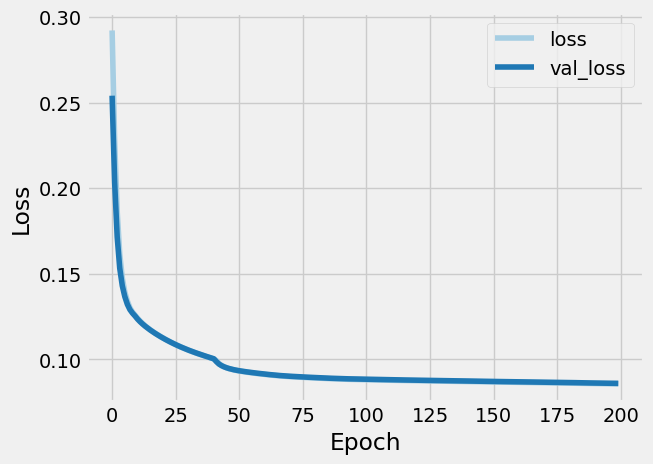


--- Iteration 2 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.6007 - val_loss: 0.4313
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.3899 - val_loss: 0.2890
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2666 - val_loss: 0.2134
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2016 - val_loss: 0.1744
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1684 - val_loss: 0.1559
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1528 - val_loss: 0.1461
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1440 - val_loss: 0.1397
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1379 - val_loss: 0.1350
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1336 - val_loss: 0.1314
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1303 - val_loss: 0.1284
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1273 - val_loss: 0.1259
Epoch 12/200
24/24 ━━━━━━━━━━━━

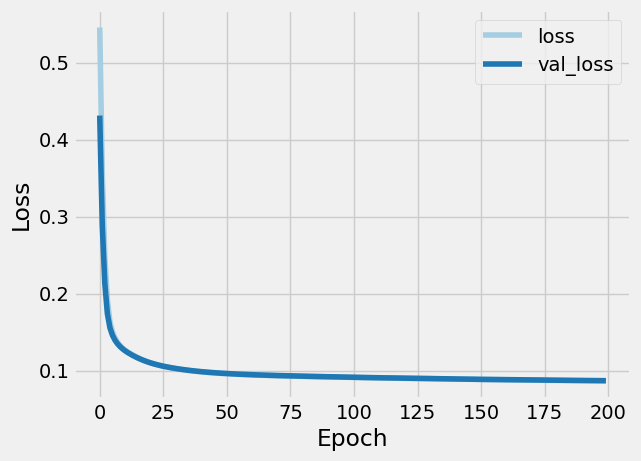


--- Iteration 3 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.4242 - val_loss: 0.3572
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.3371 - val_loss: 0.2838
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.2695 - val_loss: 0.2325
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.2216 - val_loss: 0.1944
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.1872 - val_loss: 0.1701
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.1656 - val_loss: 0.1548
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.1516 - val_loss: 0.1445
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.1422 - val_loss: 0.1373
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.1356 - val_loss: 0.1320
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.1305 - val_loss: 0.1279
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.1266 - val_loss: 0.1245
Epoch 12/200
24/24 ━━━━━━━━━━━

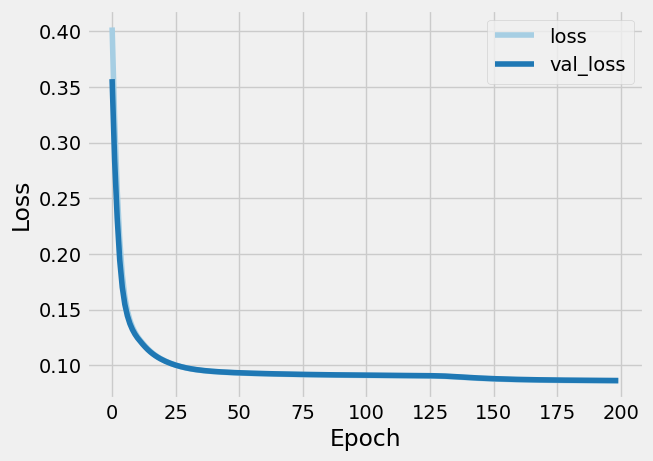


--- Iteration 4 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.5942 - val_loss: 0.5481
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.5295 - val_loss: 0.4631
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.4347 - val_loss: 0.3481
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.3234 - val_loss: 0.2606
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.2455 - val_loss: 0.2091
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.2001 - val_loss: 0.1785
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1726 - val_loss: 0.1588
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1549 - val_loss: 0.1455
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1425 - val_loss: 0.1360
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1340 - val_loss: 0.1290
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1271 - val_loss: 0.1236
Epoch 12/200
24/24 ━━━━━━━━━━━

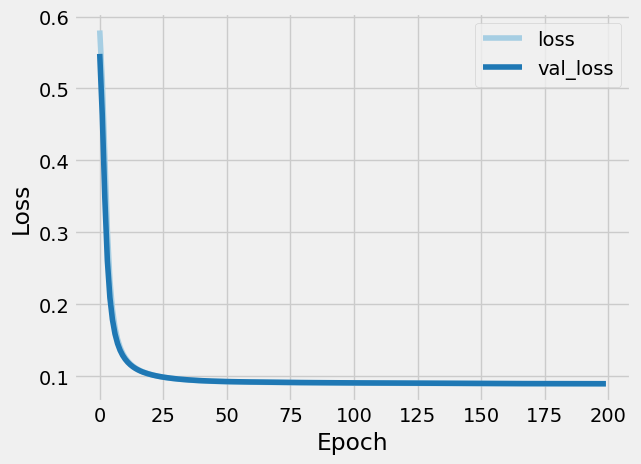


--- Iteration 5 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.9193 - val_loss: 0.7782
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.7322 - val_loss: 0.5991
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.5599 - val_loss: 0.4519
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.4231 - val_loss: 0.3489
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.3303 - val_loss: 0.2823
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2701 - val_loss: 0.2389
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2307 - val_loss: 0.2099
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2044 - val_loss: 0.1898
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1854 - val_loss: 0.1751
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1720 - val_loss: 0.1641
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1615 - val_loss: 0.1554
Epoch 12/200
24/24 ━━━━━━━━━━━━

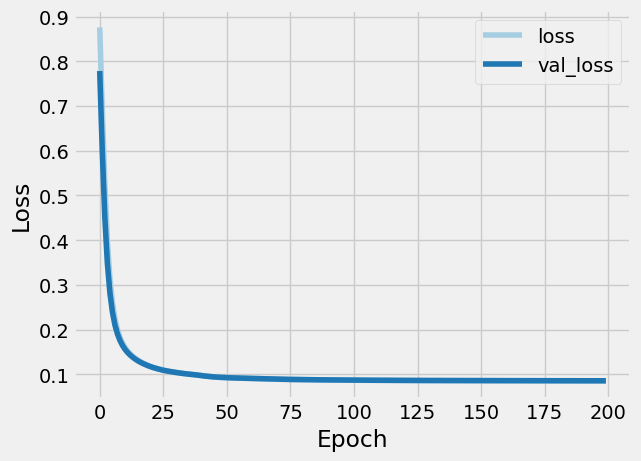


--- Iteration 6 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.4778 - val_loss: 0.3867
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.3677 - val_loss: 0.3218
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.3106 - val_loss: 0.2808
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2724 - val_loss: 0.2494
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2426 - val_loss: 0.2243
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2190 - val_loss: 0.2044
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1999 - val_loss: 0.1882
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1845 - val_loss: 0.1752
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1723 - val_loss: 0.1648
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1625 - val_loss: 0.1564
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1544 - val_loss: 0.1497
Epoch 12/200
24/24 ━━━━━━━━━━━━

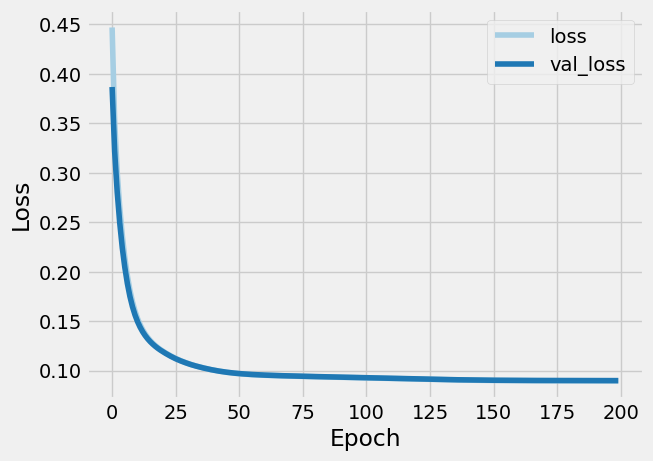


--- Iteration 7 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.4639 - val_loss: 0.4000
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3800 - val_loss: 0.3259
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.3112 - val_loss: 0.2719
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2610 - val_loss: 0.2323
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2244 - val_loss: 0.2039
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1981 - val_loss: 0.1838
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1797 - val_loss: 0.1698
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1669 - val_loss: 0.1598
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1576 - val_loss: 0.1525
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1507 - val_loss: 0.1469
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1452 - val_loss: 0.1423
Epoch 12/200
24/24 ━━━━━━━━━━━━

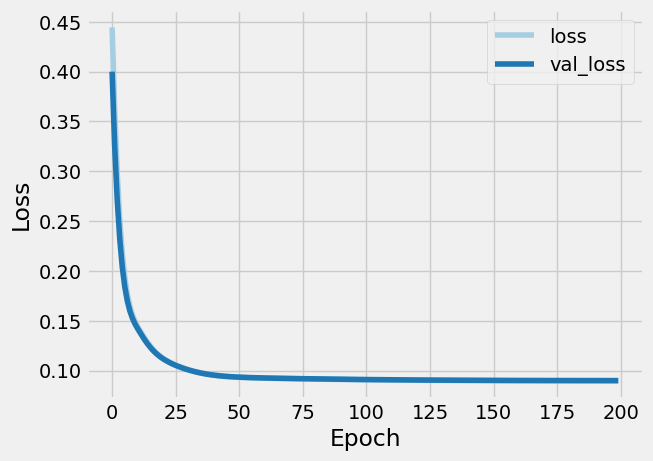


--- Iteration 8 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2447 - val_loss: 0.2156
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2077 - val_loss: 0.1878
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1820 - val_loss: 0.1687
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1648 - val_loss: 0.1556
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1526 - val_loss: 0.1462
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1432 - val_loss: 0.1367
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1340 - val_loss: 0.1296
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1279 - val_loss: 0.1243
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1227 - val_loss: 0.1202
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1187 - val_loss: 0.1169
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1161 - val_loss: 0.1141
Epoch 12/200
24/24 ━━━━━━━━━━━━

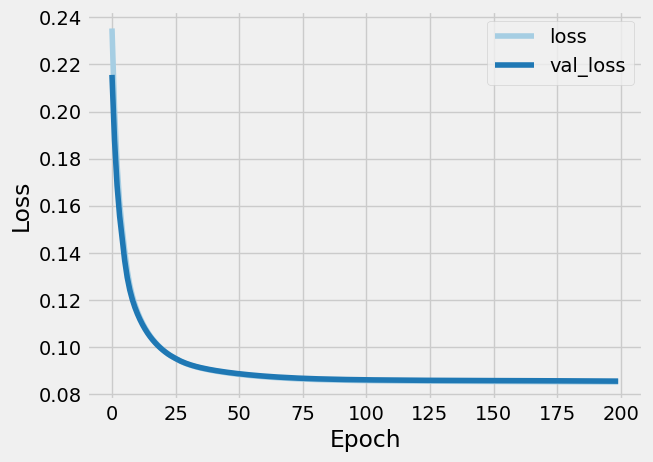


--- Iteration 9 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.8334 - val_loss: 0.6984
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.6608 - val_loss: 0.5554
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.5250 - val_loss: 0.4396
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.4159 - val_loss: 0.3542
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.3379 - val_loss: 0.2936
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.2813 - val_loss: 0.2480
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.2388 - val_loss: 0.2141
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.2073 - val_loss: 0.1895
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.1846 - val_loss: 0.1718
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.1682 - val_loss: 0.1592
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.1565 - val_loss: 0.1500
Epoch 12/200
24/24 ━━━━━━━━━━━

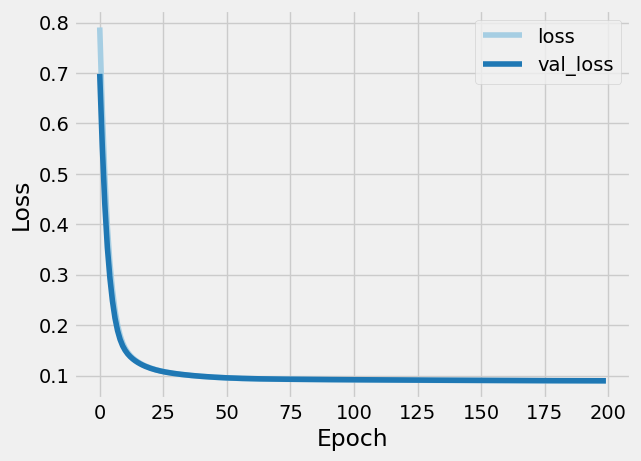


--- Iteration 10 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.5361 - val_loss: 0.4690
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.4494 - val_loss: 0.3939
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.3773 - val_loss: 0.3294
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.3148 - val_loss: 0.2725
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.2605 - val_loss: 0.2284
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.2199 - val_loss: 0.1972
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.1911 - val_loss: 0.1756
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.1715 - val_loss: 0.1610
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1582 - val_loss: 0.1512
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1490 - val_loss: 0.1445
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1431 - val_loss: 0.1399
Epoch 12/200
24/24 ━━━━━━━━━━

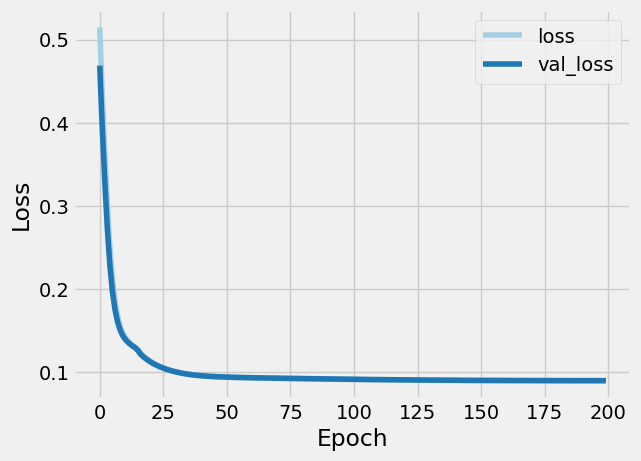


--- Iteration 11 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.6675 - val_loss: 0.5838
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.5592 - val_loss: 0.4888
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.4684 - val_loss: 0.4092
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3908 - val_loss: 0.3386
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3237 - val_loss: 0.2826
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2710 - val_loss: 0.2394
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2307 - val_loss: 0.2068
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2000 - val_loss: 0.1823
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1773 - val_loss: 0.1641
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1602 - val_loss: 0.1503
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1472 - val_loss: 0.1398
Epoch 12/200
24/24 ━━━━━━━━━━

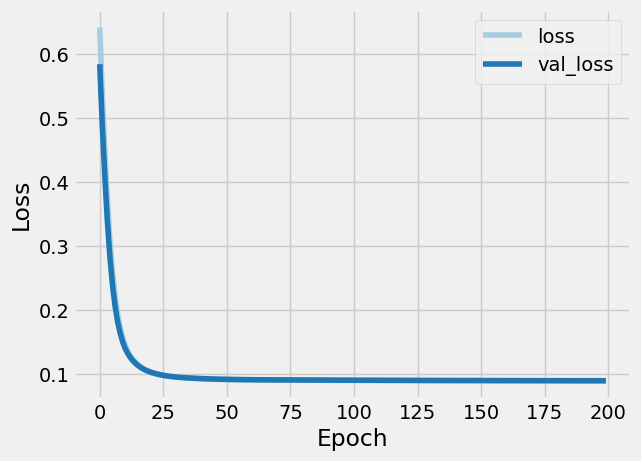


--- Iteration 12 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.6390 - val_loss: 0.5145
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.4808 - val_loss: 0.3901
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.3669 - val_loss: 0.3065
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2903 - val_loss: 0.2465
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2348 - val_loss: 0.2048
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1971 - val_loss: 0.1777
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1729 - val_loss: 0.1607
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1575 - val_loss: 0.1502
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1481 - val_loss: 0.1436
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1422 - val_loss: 0.1393
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1384 - val_loss: 0.1363
Epoch 12/200
24/24 ━━━━━━━━━━━

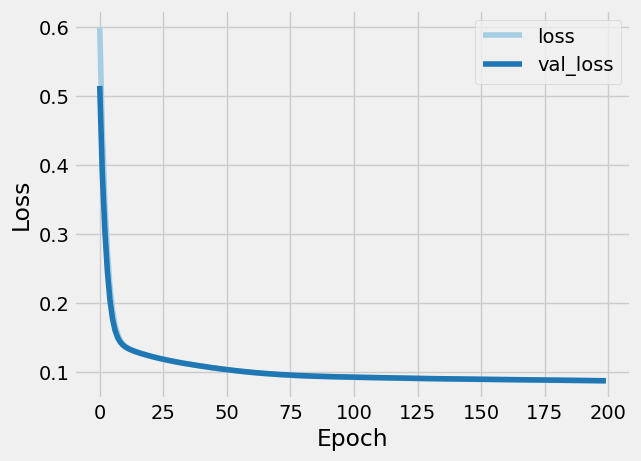


--- Iteration 13 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.1866 - val_loss: 1.0027
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.9463 - val_loss: 0.7897
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.7459 - val_loss: 0.6255
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.5935 - val_loss: 0.5086
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.4835 - val_loss: 0.4121
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.3917 - val_loss: 0.3369
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.3220 - val_loss: 0.2828
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2723 - val_loss: 0.2455
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2383 - val_loss: 0.2190
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2134 - val_loss: 0.1991
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1949 - val_loss: 0.1842
Epoch 12/200
24/24 ━━━━━━━━━━━

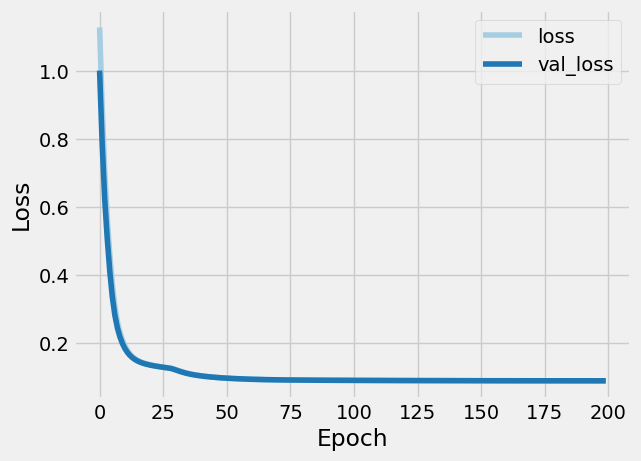


--- Iteration 14 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.4599 - val_loss: 0.3906
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3645 - val_loss: 0.2897
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2671 - val_loss: 0.2067
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1930 - val_loss: 0.1647
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1591 - val_loss: 0.1463
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1429 - val_loss: 0.1360
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1341 - val_loss: 0.1298
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1282 - val_loss: 0.1253
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1242 - val_loss: 0.1217
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1203 - val_loss: 0.1186
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1176 - val_loss: 0.1161
Epoch 12/200
24/24 ━━━━━━━━━━━

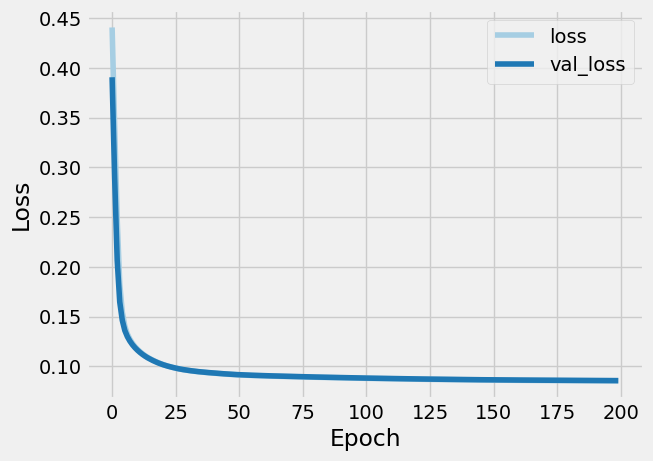


--- Iteration 15 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3863 - val_loss: 0.3046
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2843 - val_loss: 0.2335
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2212 - val_loss: 0.1907
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1830 - val_loss: 0.1637
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1582 - val_loss: 0.1451
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1413 - val_loss: 0.1325
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1300 - val_loss: 0.1240
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1222 - val_loss: 0.1182
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1168 - val_loss: 0.1139
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1127 - val_loss: 0.1106
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1096 - val_loss: 0.1079
Epoch 12/200
24/24 ━━━━━━━━━━━

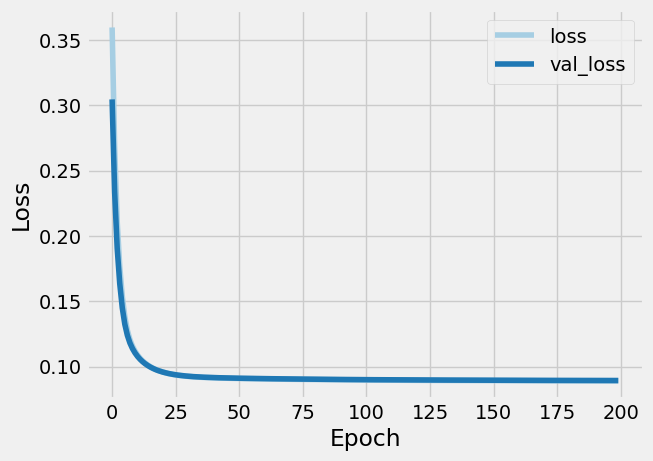


--- Iteration 16 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3394 - val_loss: 0.2910
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2806 - val_loss: 0.2538
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2454 - val_loss: 0.2225
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2153 - val_loss: 0.1960
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1899 - val_loss: 0.1742
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1698 - val_loss: 0.1586
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1553 - val_loss: 0.1475
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1448 - val_loss: 0.1394
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1375 - val_loss: 0.1333
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1319 - val_loss: 0.1286
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1274 - val_loss: 0.1246
Epoch 12/200
24/24 ━━━━━━━━━━━

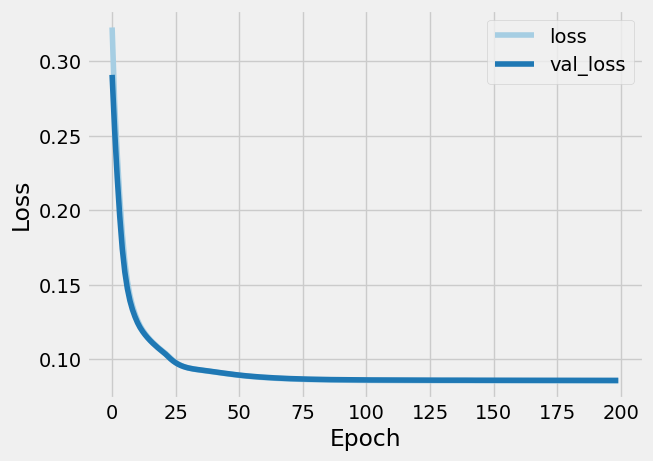


--- Iteration 17 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 1.1518 - val_loss: 0.9599
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.8902 - val_loss: 0.6411
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.5588 - val_loss: 0.3565
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.3166 - val_loss: 0.2266
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2091 - val_loss: 0.1720
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1655 - val_loss: 0.1524
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1494 - val_loss: 0.1431
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1413 - val_loss: 0.1372
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1355 - val_loss: 0.1326
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1313 - val_loss: 0.1288
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1277 - val_loss: 0.1256
Epoch 12/200
24/24 ━━━━━━━━━━━

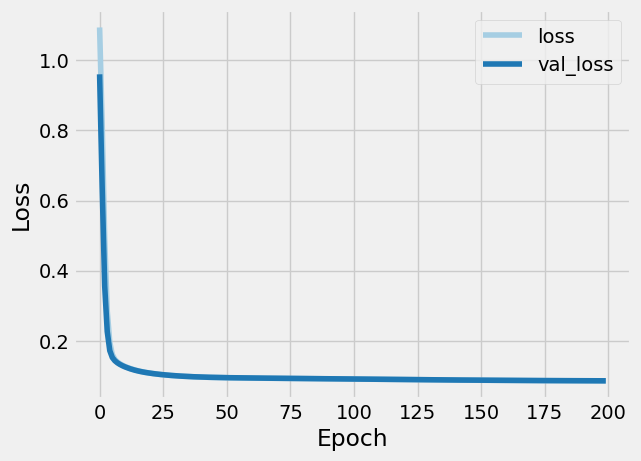


--- Iteration 18 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.7313 - val_loss: 0.6275
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.5988 - val_loss: 0.5194
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.4970 - val_loss: 0.4370
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.4216 - val_loss: 0.3787
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.3657 - val_loss: 0.3285
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.3173 - val_loss: 0.2855
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2761 - val_loss: 0.2497
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2419 - val_loss: 0.2207
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2143 - val_loss: 0.1975
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1924 - val_loss: 0.1792
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1752 - val_loss: 0.1648
Epoch 12/200
24/24 ━━━━━━━━━━━

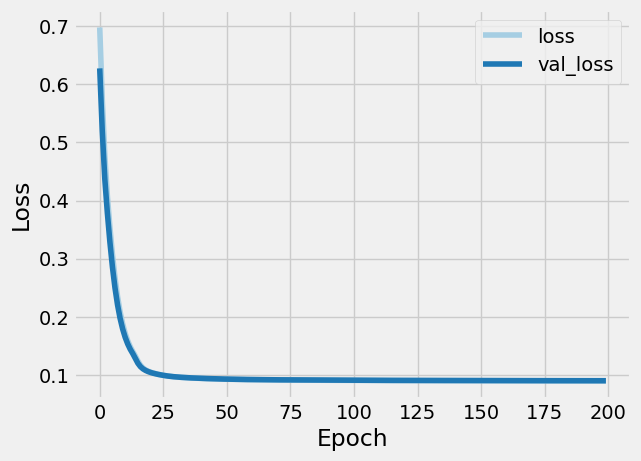


--- Iteration 19 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.4230 - val_loss: 0.3308
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3084 - val_loss: 0.2532
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2399 - val_loss: 0.2068
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1982 - val_loss: 0.1769
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1715 - val_loss: 0.1588
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1554 - val_loss: 0.1478
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1454 - val_loss: 0.1407
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1389 - val_loss: 0.1359
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1345 - val_loss: 0.1321
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1309 - val_loss: 0.1289
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1279 - val_loss: 0.1260
Epoch 12/200
24/24 ━━━━━━━━━━━

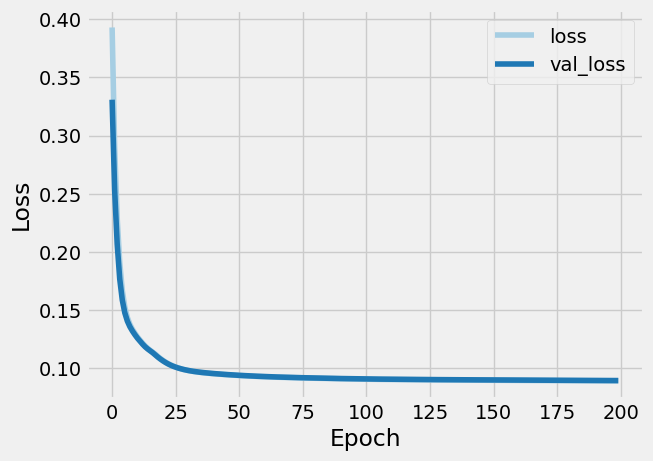


--- Iteration 20 ---
Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.8412 - val_loss: 0.6933
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.6548 - val_loss: 0.5504
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.5223 - val_loss: 0.4432
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.4202 - val_loss: 0.3580
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.3416 - val_loss: 0.2978
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2862 - val_loss: 0.2559
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2476 - val_loss: 0.2257
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2197 - val_loss: 0.2036
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1992 - val_loss: 0.1874
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1840 - val_loss: 0.1754
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.1730 - val_loss: 0.1666
Epoch 12/200
24/24 ━━━━━━━━━━━

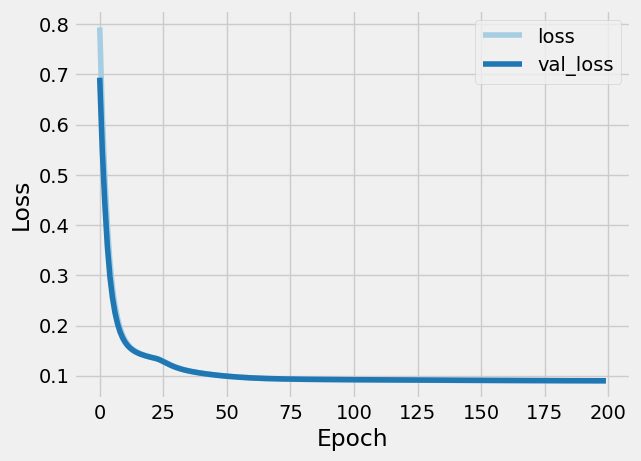

In [23]:
# 训练循环
from keras.callbacks import ModelCheckpoint

for iteration in range(count):
    print(f"\n--- Iteration {iteration + 1} ---")
    final_model = XXXModel(alpha, lambda_k, k_values)
    final_model.compile(optimizer='adam')

    mcp_save = ModelCheckpoint(
        os.path.join(model_save_dir, f'xxx_{iteration+1}.weights.h5'),
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        save_weights_only=True
    )

    history = final_model.fit(
        [X_train, T_train, Y_visit_train],
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        validation_split=0.2,
        verbose=1,
        callbacks=[mcp_save]
    )

    plot_loss(history, "loss", "val_loss")
  


iteration = 1
131059/131059 ━━━━━━━━━━━━━━━━━━━━ 148s 1ms/step
AUC:  0.9420411093913305
MSE:  0.030306342989206314
model    0.810475
dtype: float64


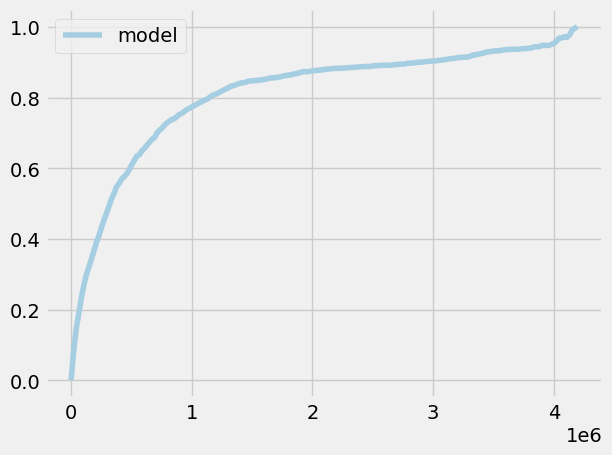

iteration = 2
131059/131059 ━━━━━━━━━━━━━━━━━━━━ 120s 912us/step


KeyboardInterrupt: 

In [24]:
# 存储所有模型的 AUUC 结果
from sklearn import metrics

all_auuc_scores = []

for i in range(count):
    print(f"iteration = {i + 1}")

    model_file = os.path.join(model_save_dir, f'xxx_{i+1}.weights.h5')

    final_model = XXXModel(alpha, lambda_k, k_values)
    final_model.load_weights(model_file)

    y_pred_test_all = final_model.predict([X_test, T_test, Y_visit_test])
    y_pred_test_all = np.array(y_pred_test_all)
    selected_output = y_pred_test_all[0]
    print("AUC: ", metrics.roc_auc_score(Y_visit_test, selected_output))
    print("MSE: ", metrics.mean_squared_error(Y_visit_test, selected_output))

    uplift_pred_test = y_pred_test_all[1] - y_pred_test_all[2]

    auuc_score = get_causalml_auuc(Y=Y_visit_test, T=T_test, ite_pred=uplift_pred_test)
    all_auuc_scores.append(auuc_score)

all_auuc_scores

In [18]:
import numpy as np

def get_auuc_scores(causalml_auuc_list): 
    auuc_scores = []
    for x in causalml_auuc_list:
        auuc_scores.append(x[0].iloc[0])
    return np.array(auuc_scores)

def print_auuc_res(model_name, auuc_scores):
    print("model: ", model_name)
    
    print("auuc list: ", auuc_scores)
    print("auuc mean: ", np.mean(auuc_scores))
    print("auuc variance: ", np.var(auuc_scores))
    print("auuc standard deviation: ", np.std(auuc_scores))
    
    print()

list = get_auuc_scores(all_auuc_scores)
print("auuc mean: ", np.mean(list))
print("auuc variance: ", np.var(list))
print("auuc standard deviation: ", np.std(list))


auuc mean:  0.790834444008691
auuc variance:  0.0028444285287883226
auuc standard deviation:  0.05333318412384847


#### 第二版：随便搭的架构，模型效果堪比random

In [ ]:
import tensorflow as tf
from keras import layers, regularizers, Model
from keras.layers import Input, Dense, Lambda
import os
from keras import backend as K
from tensorflow import keras

def select_output(inputs):
    t, output_t1, output_t0 = inputs
    return K.switch(K.equal(t, 1), output_t1, output_t0)

class exp(keras.Layer):
    def call(self, x):
        return tf.exp(x)
    
class sum(keras.Layer):
    def call(self, x):
        return tf.reduce_sum(x)
    
class square(keras.Layer):
    def call(self, x):
        return tf.square(x)
    
class mean(keras.Layer):
    def call(self, x):
        return tf.reduce_mean(x)
    
class addloss(keras.Layer):
    def call(self, x):
        self.add_loss(x)
        return x


def XXXModel(alpha, lambda_k, k_values):
    input_x = Input(shape=(12,), name="features")
    input_t = Input(shape=(1,), name = "treatments")
    y_true = Input(shape=(1,), name = "y_true")

    input_x_t = layers.concatenate([input_x, input_t])

    dense1 = Dense(8, activation='relu', name='dense1', kernel_regularizer=regularizers.l2(1e-5))(input_x_t)
    t1_y_pred = Dense(1, kernel_regularizer=regularizers.l2(1e-5), name='t1_y_pred')(dense1)
    t0_y_pred = Dense(1, kernel_regularizer=regularizers.l2(1e-5), name='t0_y_pred')(dense1)

    XXX_model = Model(inputs=[input_x, input_t, y_true], outputs=[t1_y_pred, t0_y_pred])

    # Prediction loss
    selected_output = layers.Lambda(select_output, output_shape=(None, 1), name='final_output')([input_t, t1_y_pred, t0_y_pred])
    pl_loss = tf.keras.losses.MSE(y_true, selected_output)

    # Decision loss
    tau_hat = t1_y_pred - t0_y_pred
    dl_loss = 0.0
    for k in k_values:
        k = tf.cast(k, dtype=tf.float32)
        scores = tau_hat - lambda_k
        probabilities = exp()(scores) / sum()(exp()(scores)) # softmax(scores)
        expected_uplift = sum()(probabilities * tau_hat)
        dl_loss += (-expected_uplift - lambda_k * k)/k
    
    total_loss = alpha * sum()(pl_loss) + sum()(dl_loss)
    
    addloss()(total_loss)    # model.add_loss(total_loss)

    return XXX_model



In [ ]:
# 模型和训练参数
#num_treatments = 2
batch_size = 1000000
k_values = [int(0.01 * batch_size), int(0.05 * batch_size), int(0.1 * batch_size), int(0.2 * batch_size), int(0.25 * batch_size), int(0.5 * batch_size)]
#num_k = len(k_values)
lambda_k = tf.constant(0, dtype=tf.float32)
alpha = tf.constant(1.2, dtype=tf.float32)
learning_rate = 0.001
epochs = 10

model_save_dir = "../model_file/uplift/criteo/final_model/my_xxx/v2_batch_1mil_epoch_10/"
os.makedirs(model_save_dir, exist_ok=True)



In [ ]:
# 训练循环
from keras.callbacks import ModelCheckpoint

final_model = XXXModel(alpha, lambda_k, k_values)
final_model.compile(optimizer='adam')


for iteration in range(count):
    print(f"\n--- Iteration {iteration + 1} ---")
    final_model = XXXModel(alpha, lambda_k, k_values)
    final_model.compile(optimizer='adam')

    mcp_save = ModelCheckpoint(
        os.path.join(model_save_dir, f'xxx_alpha1.2_{iteration+1}.weights.h5'),
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        save_weights_only=True
    )


    history = final_model.fit(
        [X_train, T_train, Y_visit_train],
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        validation_split=0.2,
        verbose=1,
        callbacks=[mcp_save]
    )

    plot_loss(history, "loss", "val_loss")


In [ ]:
# 存储所有模型的 AUUC 结果
all_auuc_scores = []

for i in range(count):
    print(f"iteration = {i + 1}")

    model_file = os.path.join(model_save_dir, f'xxx_alpha1.2_{i+1}.weights.h5')

    final_model = XXXModel(alpha, lambda_k, mu_k, k_values, batch_size)
    final_model.load_weights(model_file)
    final_model.summary()

    y_pred_test_all = final_model.predict([X_test, T_test, Y_visit_test])
    y_pred_test_all = np.array(y_pred_test_all)
    uplift_pred_test = y_pred_test_all[:, 0] - y_pred_test_all[:, 1]

    try:
        auuc_score = get_causalml_auuc(Y=Y_visit_test, T=T_test, ite_pred=uplift_pred_test.flatten())
        print(f"  AUUC on test set: {auuc_score}")
        all_auuc_scores.append(auuc_score)
    except Exception as e:
        print(f"  评估模型权重 {i+1} 时发生错误 (AUUC): {e}")

